In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path
from samesh.data.loaders import read_mesh
from samesh.utils.mesh import duplicate_verts

In [7]:
MESH_DIRS = [
    '/home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-sdf',
    '/home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-norm',
    '/home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-combined',
    '/home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-matte',
    '/home/ubuntu/meshseg/tests/mesh_segmentation_output_shape_diameter_function-5-15',
]

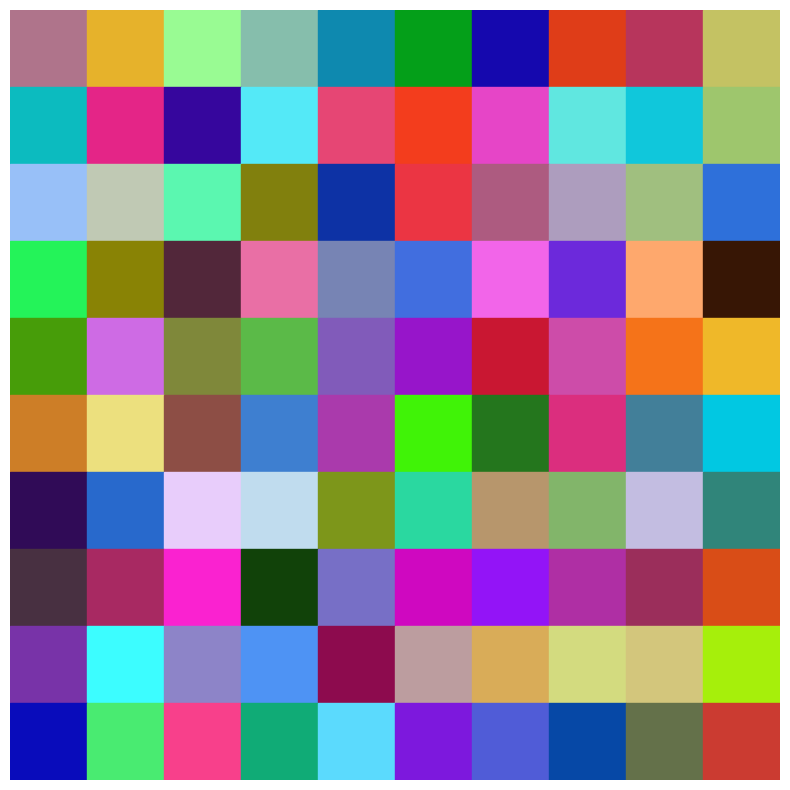

In [5]:
import random

grid_size = 10

COLORS = np.random.rand(grid_size ** 2, 3)

fig, ax = plt.subplots(figsize=(grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        idx = i * grid_size + j
        rect = plt.Rectangle((j, grid_size - i - 1), 1, 1, color=COLORS[idx])
        ax.add_patch(rect)

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

In [8]:
for dir in MESH_DIRS:
    print('Recoloring segmented meshes in ', dir)
    labels = glob.glob(f'{dir}/*/*.json')
    meshes = glob.glob(f'{dir}/*/*segmented.glb') # only recolor original meshes

    for filename_face2label, filename_mesh in tqdm(zip(labels, meshes)):
        with open(filename_face2label, 'r') as f:
            face2label = json.load(f)
        face2label = {int(k): v for k, v in face2label.items()}
        face2label = sorted(face2label.items())
        face2label = np.array([v for (_, v) in face2label])
        face2label_renumbered = np.zeros_like(face2label)
        for i, v in enumerate(np.unique(face2label)):
            face2label_renumbered[face2label == v] = i

        mesh = read_mesh(filename_mesh)
        mesh = duplicate_verts(mesh) # avoid face color interpolation due to OpenGL storing data in vertices
        mesh.visual.face_colors = COLORS[face2label_renumbered[:mesh.faces.shape[0]]]
        mesh.export(filename_mesh.replace('.glb', '_recolored.glb'))

Recoloring segmented meshes in  /home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-sdf


0it [00:00, ?it/s]

75it [00:08,  8.96it/s]


Recoloring segmented meshes in  /home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-norm


75it [00:08,  8.94it/s]


Recoloring segmented meshes in  /home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-combined


75it [00:08,  8.97it/s]


Recoloring segmented meshes in  /home/ubuntu/meshseg/tests/mesh_segmentation_output-dynamic-0.125-6-0.5-matte


75it [00:08,  8.97it/s]


Recoloring segmented meshes in  /home/ubuntu/meshseg/tests/mesh_segmentation_output_shape_diameter_function-5-15


75it [00:08,  8.69it/s]
